# Multiclass logistic regression using the Keras API

Keras is a neural network Application Programming Interface (API) for Python that is tightly integrated with TensorFlow, which is used to build machine learning models. Keras’ models offer a simple, user-friendly way to define a neural network, which will then be built for you by TensorFlow. 

This notebook will perform the same operations as the multi_class_logistic_regression.ipynb but will user Keras syntax.

## Step 1: Set up packages

In [2]:
!pip install -q -U tensorflow


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from matplotlib import pyplot  
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2023-05-17 15:49:26.894180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.12.0


## Step 2: Load and prepare the MNIST dataset

MNIST data is a collection of hand-written digits that contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 255. 

In [4]:
# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel intensities to make sure their values are between 0 to 1
# by dividing them by 255.  This also converts the sample data from integers to
# floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

## Step 3: Build machine learning model

Models are the core entity you’ll be working with when using Keras. The models are used to define TensorFlow neural networks by specifying the attributes, functions, and layers you want. 

The Sequential API is a framework for creating models based on instances of the sequential() class. The model has one input variable, a hidden layer with two neurons, and an output layer with one binary output. Additional layers can be created and added to the model.

A Sequential model is not appropriate when:
- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [5]:
# This model uses the Flatten, Dense, and Dropout layers
# For each example, the model returns a vector of logits or log-odds scores
# one for each class
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten the input layer to a vector of length 784
  tf.keras.layers.Dense(128, activation='relu'), # Add a hidden layer with 128 neurons and ReLU activation
  tf.keras.layers.Dropout(0.2), # Add a dropout layer for previous hidden layer
  tf.keras.layers.Dense(10) # Add an output layer with 10 neurons and no activation
])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.968958  ,  0.25654188,  0.54456455,  0.33389446, -0.6383831 ,
        -0.11961815,  0.22255343, -0.30617988, -0.42158338,  0.8832635 ]],
      dtype=float32)

In [7]:
# The tf.nn.softmax function converts these logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

array([[0.03367784, 0.11470226, 0.15298846, 0.12392695, 0.04687174,
        0.07874224, 0.11086922, 0.0653409 , 0.05821916, 0.2146613 ]],
      dtype=float32)

In [8]:
# Define a loss function for training using losses.SparseCategoricalCrossentropy
# The loss function takes a vector of ground truth values and a vector of logits 
# and returns a scalar loss for each example. This loss is equal to the negative
# log probability of the true class: The loss is zero if the model is sure of the 
# correct class. This untrained model gives probabilities close to random 
# (1/10 for each class)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.5415754

In [10]:
# Configure and compile the model using Keras Model.compile. Set the optimizer 
# class to adam, set the loss to the loss_fn function defined earlier, and 
# specify a metric to be evaluated for the model by setting the metrics parameter
# to accuracy
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Step 4: Train and evaluate the model

In [11]:
# Use the Model.fit method to adjust your model parameters and minimize the loss
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1419 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1064 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0884 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0746 - accuracy: 0.9761


In [12]:
# Use the Model.evaluate method to check the model's performance
# (usually on a validation set or test set)
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0774 - accuracy: 0.9772 - 387ms/epoch - 1ms/step


[0.07737389206886292, 0.9771999716758728]

In [13]:
# To return a probability, wrap the trained model, and attach the softmax to it
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [14]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.1271688e-07, 2.2126376e-09, 2.2190145e-06, 2.1177578e-04,
        9.2673690e-12, 1.5853747e-07, 7.7941330e-16, 9.9978298e-01,
        8.8108806e-08, 2.6214589e-06],
       [2.3014521e-09, 3.8711546e-06, 9.9999344e-01, 2.5787792e-06,
        2.6527340e-15, 3.6198173e-08, 5.2149609e-09, 1.2493834e-14,
        9.9902522e-08, 4.4355893e-13],
       [1.6396561e-07, 9.9879563e-01, 1.6209485e-04, 1.8059609e-05,
        5.2159721e-05, 6.2514318e-06, 6.9800350e-05, 6.0526910e-04,
        2.8240849e-04, 8.1568569e-06],
       [9.9963820e-01, 2.4869873e-08, 2.5072083e-04, 2.7807921e-08,
        8.4042114e-08, 3.3201175e-06, 1.4431982e-06, 9.7718017e-05,
        1.7256982e-08, 8.3928544e-06],
       [5.4780645e-05, 2.3070065e-08, 8.9600408e-06, 3.7197829e-08,
        9.9054468e-01, 4.9822432e-07, 2.1790194e-05, 2.3615561e-04,
        7.3724271e-07, 9.1322893e-03]], dtype=float32)>

## Manually check if it works... 

Print the index of the largest softmax probability for the 0th item in our MNIST
dataset & visualise that image to see if they match!

In [28]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.1271688e-07, 2.2126376e-09, 2.2190145e-06, 2.1177578e-04,
        9.2673690e-12, 1.5853747e-07, 7.7941330e-16, 9.9978298e-01,
        8.8108806e-08, 2.6214589e-06],
       [2.3014521e-09, 3.8711546e-06, 9.9999344e-01, 2.5787792e-06,
        2.6527340e-15, 3.6198173e-08, 5.2149609e-09, 1.2493834e-14,
        9.9902522e-08, 4.4355893e-13],
       [1.6396561e-07, 9.9879563e-01, 1.6209485e-04, 1.8059609e-05,
        5.2159721e-05, 6.2514318e-06, 6.9800350e-05, 6.0526910e-04,
        2.8240849e-04, 8.1568569e-06],
       [9.9963820e-01, 2.4869873e-08, 2.5072083e-04, 2.7807921e-08,
        8.4042114e-08, 3.3201175e-06, 1.4431982e-06, 9.7718017e-05,
        1.7256982e-08, 8.3928544e-06],
       [5.4780645e-05, 2.3070065e-08, 8.9600408e-06, 3.7197829e-08,
        9.9054468e-01, 4.9822432e-07, 2.1790194e-05, 2.3615561e-04,
        7.3724271e-07, 9.1322893e-03]], dtype=float32)>

In [54]:
preds = probability_model(x_test[:5])
for pred in preds:
    print(pred.numpy().argmax())

7
2
1
0
4


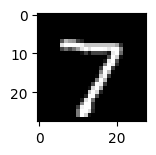

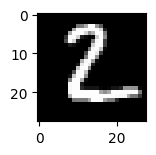

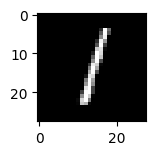

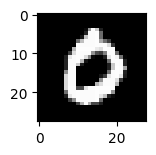

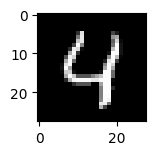

In [55]:
for i in range(5):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()